In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,356,019","3,933,653"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,736,129","1,690,793"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"15,804,504","13,902,503"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"5,634,429","5,050,722"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.51
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       4.80     32.00      0.00
           survey      3.23     19.38      0.00
HOV2       model       9.60     20.87      2.11
           survey      6.81     16.70      0.04
HOV3+      model      10.29     21.80      2.26
           survey     11.60     22.57      0.30
SOV        model       9.40     21.37      2.01
           survey      8.63     19.75      0.18
School Bus model       4.23     11.27      0.85
TNC        model       6.21     17.30      1.41
           survey      3.57     13.23      0.01
Transit    model      10.88     40.14      2.56
           survey      7.11     34.18      3.09
Walk       model       0.75     14.94      0.00
           survey      0.90     18.15      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.47     16.47      0.00
           survey      2.01     12.10      0.00
HOV2       model       4.68     12.27      0.96
           survey      3.46     11.12      0.06
HOV3+      model       5.28     13.06      1.09
           survey      4.20     11.94      0.01
SOV        model       5.48     14.67      1.14
           survey      8.77     19.05      0.33
School Bus model       5.70     13.73      1.17
           survey      3.11     10.12      0.00
TNC        model       2.50      8.67      0.50
           survey      3.14      9.61      0.00
Transit    model       6.18     36.66      0.12
           survey      6.91     21.60      3.00
Walk       model       1.25     25.03      0.00
           survey      0.77     15.53      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,445,491","2,864,015"
1,"910,528","1,069,639"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 0-4,NaN,"223,340"
Child Age 5-15,"557,103","518,238"
Full-Time Worker,"152,140","129,226"
High School Student Age 16+,"127,563","130,458"
Non-Working Adult Age 65+,112,"1,300"
Non-Working Adult Age <65,"2,498","14,833"
Part-Time Worker,"2,494","4,454"
University Student,"68,618","47,788"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
-1.0,NaN,811
0.0,"132,088","142,831"
1.0,"565,783","543,763"
2.0,"634,590","642,966"
3+,"403,668","360,423"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
-1.0   model        0        0        0        0       0
       survey       0        0        0        0     811
0.0    model   53,578   19,780   13,151    5,061  40,502
       survey  83,498   26,951   11,784        0  20,598
1.0    model   75,195   81,382   84,720   39,610 284,777
       survey 128,662   98,859   66,358        0 249,884
2.0    model   30,763   42,815   58,615   33,634 468,663
       survey 114,053   43,356   88,732        0 396,824
3.0    model    8,576   13,099   18,974   11,667 210,603
       survey  26,161   18,842   21,389        0 158,577
4+     model    3,436    5,056    8,923    5,515 117,713
       survey  19,672   10,483   14,185        0  91,113

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

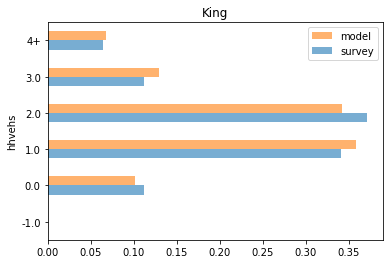

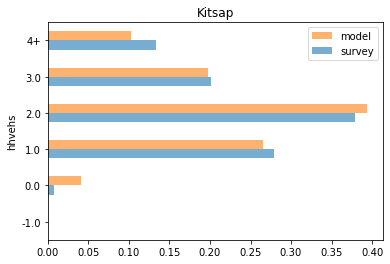

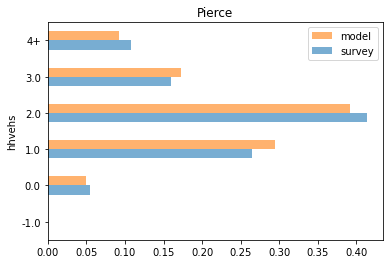

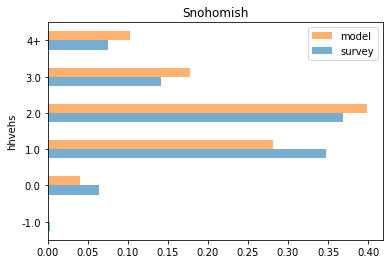

In [16]:
for county in df['hh_county'].unique():
    if county != 'Outside Region':
        _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
        _df.columns = ['survey','model']
        _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County         King Kitsap  Pierce Snohomish
Home County                                      
King           1,159,953  1,170  49,609    51,980
Kitsap            14,077 94,191  11,372       939
Outside Region       NaN      1     NaN       NaN
Pierce           104,570  6,243 299,346     1,225
Snohomish        144,155    115     818   287,195